In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
heart_df=pd.read_csv("D:\\sudip\\ML Training\\heart.csv")
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
heart_df.shape

(918, 12)

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Making a separate varaiable containing the numerical features of the dataset

In [5]:
nummerical_features=heart_df.select_dtypes(include=['int','float'])

In [6]:
nummerical_features.head(3)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0


### Making a separate varaiable containing the categorical features of the dataset

In [7]:
categorical_features=heart_df.select_dtypes(include='object')

In [8]:
categorical_features.head(3)

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up


In [9]:
nummerical_features.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
nummerical_features.corr() #relationship dhekhauna

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


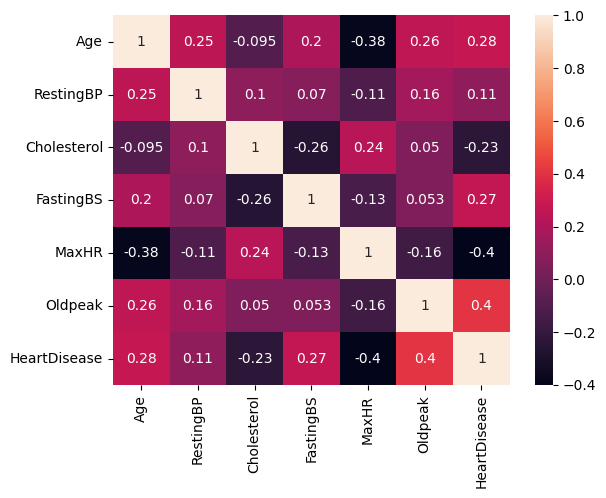

In [11]:
sns.heatmap(nummerical_features.corr(),annot=True)
plt.show()

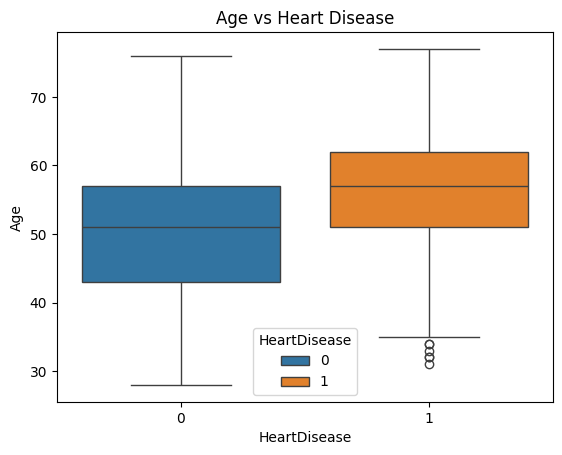

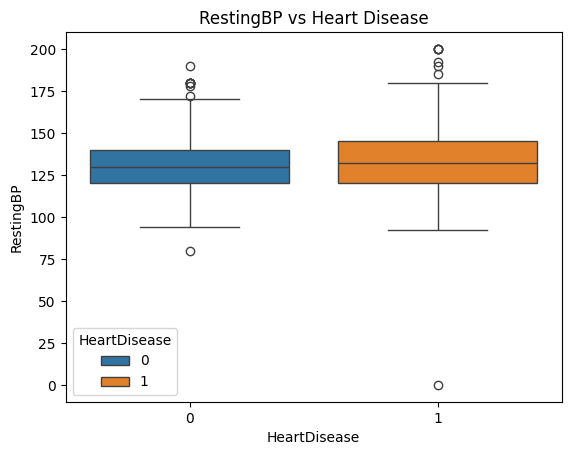

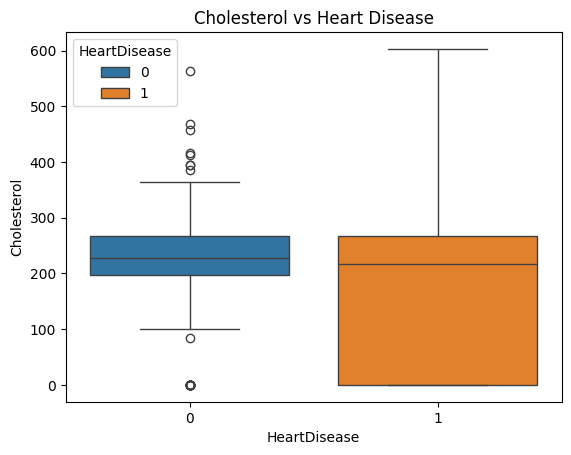

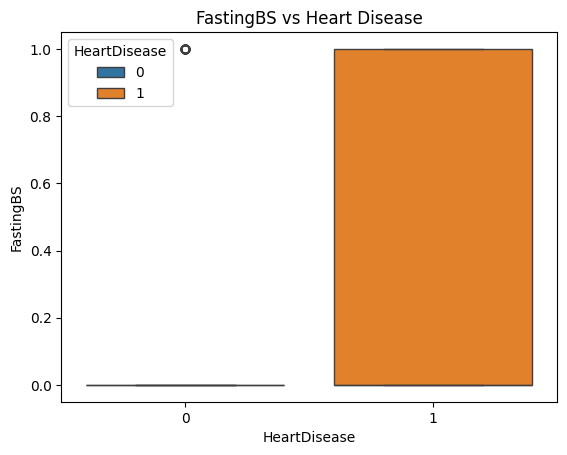

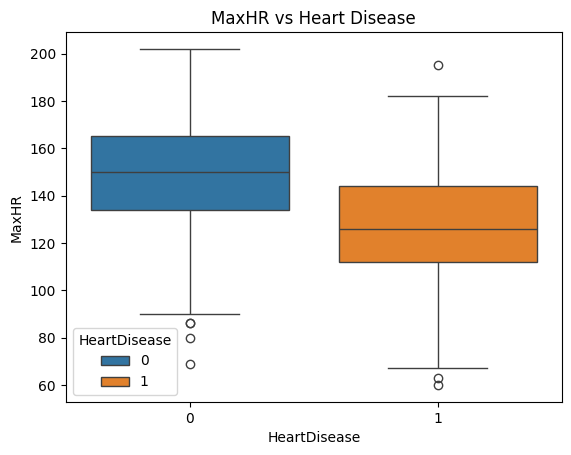

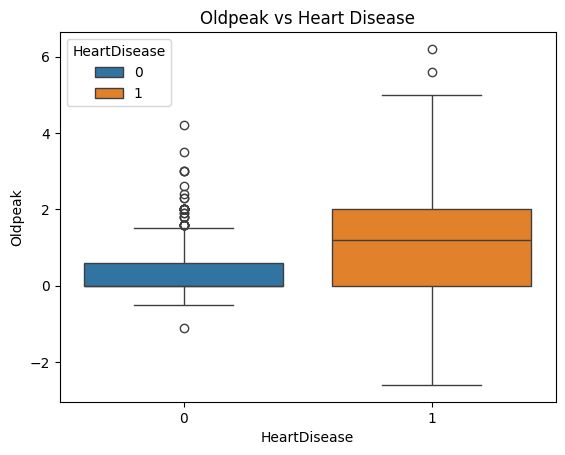

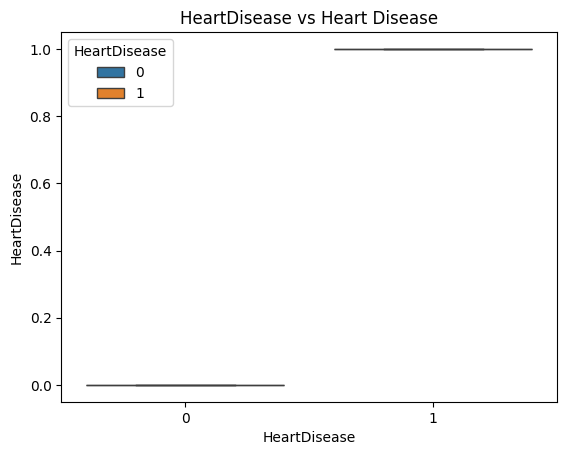

In [12]:
for col in nummerical_features.columns:
    sns.boxplot(data=nummerical_features,x='HeartDisease',y=col,hue='HeartDisease')
    plt.title(f"{col} vs Heart Disease")
    plt.show()

In [13]:
categorical_features.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


## Visualize the categorical features

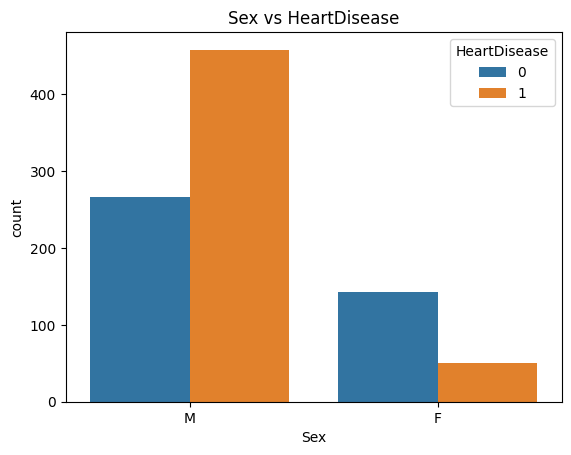

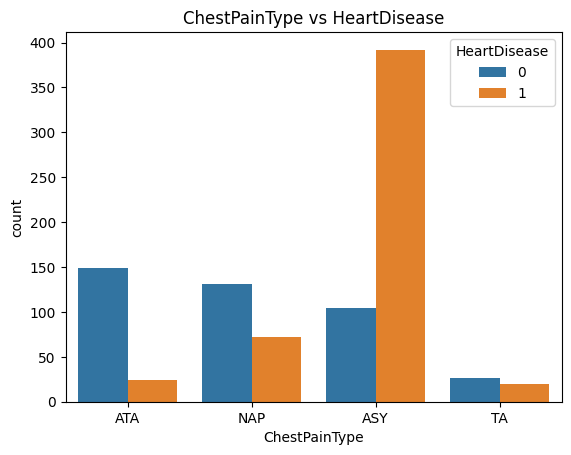

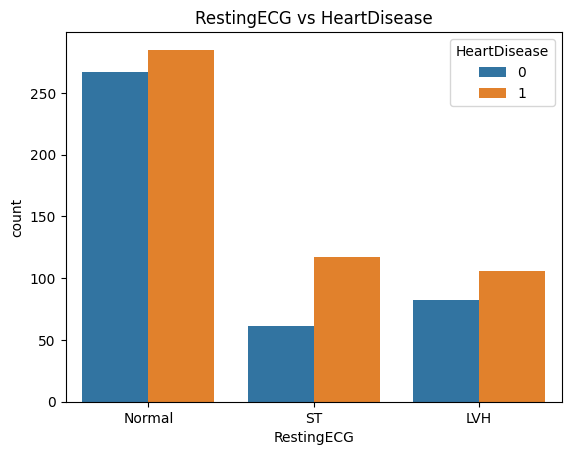

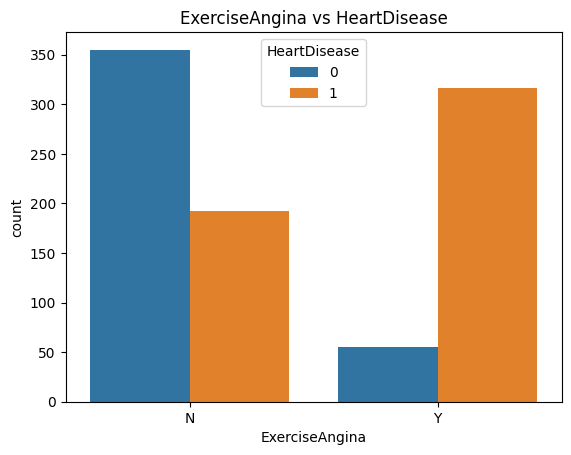

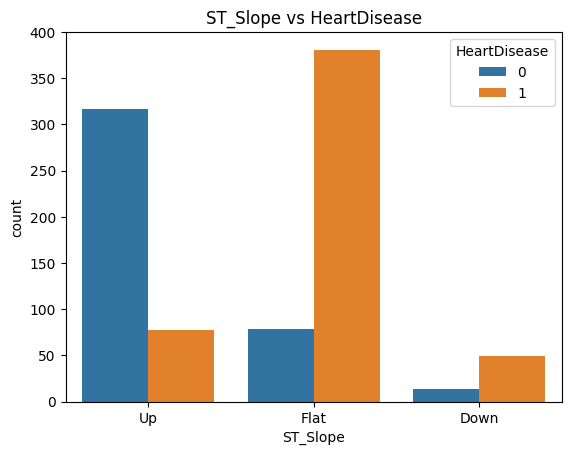

In [14]:
for col in categorical_features.columns:
    sns.countplot(data=heart_df,x=col,hue='HeartDisease')
    plt.title(f"{col} vs HeartDisease")
    plt.show()

### Converting the categorical data into a numerical data

In [15]:
categorical_features.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [16]:
for col in categorical_features.columns:
    print("***********************************************")
    print(f"{categorical_features[col].value_counts()}")
    

***********************************************
Sex
M    725
F    193
Name: count, dtype: int64
***********************************************
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
***********************************************
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
***********************************************
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
***********************************************
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [17]:
#ATA TA ASY NAP

In [18]:
heart_df_model=pd.get_dummies(data=heart_df,columns=categorical_features.columns,dtype=int)

In [19]:
heart_df_model.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [20]:
heart_df_model.shape

(918, 21)

In [21]:
heart_df_encode =pd.get_dummies(data=heart_df,columns=categorical_features.columns,drop_first=True,dtype=int)

In [22]:
heart_df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [23]:
heart_df_encode.shape

(918, 16)

In [24]:
heart_df_encode.drop(columns=['HeartDisease'])

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,0,1,0,0,0,0,0,1,0


In [25]:
x=heart_df_encode[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak','Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']]
x.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1


In [26]:
y=heart_df_encode["HeartDisease"]
y.head(5)

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(734, 15)
(184, 15)
(734,)
(184,)


### Model construction

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr=LogisticRegression()

In [31]:
model=lr.fit(x_train, y_train)
model

C:\Users\SUDIP\10_days_ml\mll0env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [32]:
predictions1=model.predict(x_test)
predictions1.shape

(184,)

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [34]:
print(f"Accuracy Score:{accuracy_score(y_test,predictions1)}")

Accuracy Score:0.8532608695652174


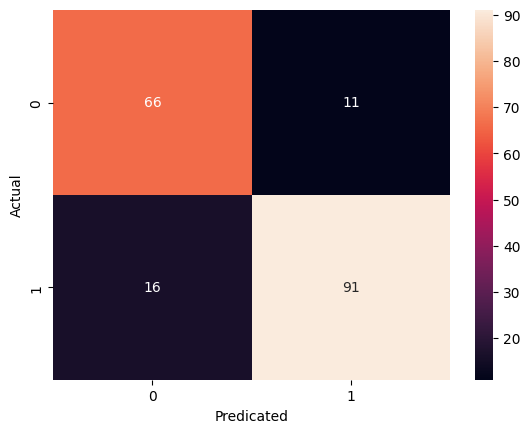

In [35]:
sns.heatmap(confusion_matrix(y_test,predictions1),annot=True)
plt.xlabel("Predicated")
plt.ylabel("Actual")
plt.show()

In [36]:
##svm means support vector manchine svc means support vector classification

In [37]:
from sklearn.svm import SVC
svc=SVC()

In [38]:
model2=svc.fit(x_train,y_train)

In [39]:
model2

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [40]:
predictions2=model2.predict(x_test)

In [41]:
print(f"Accuracy Score:{accuracy_score(y_test,predictions2)}")

Accuracy Score:0.6847826086956522


In [57]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [58]:
model3=rf.fit(x_train,y_train)

In [59]:
model3

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [60]:
predictions3=model3.predict(x_test)

In [61]:
print(f"Accuracy Score:{accuracy_score(y_test,predictions3)}")

Accuracy Score:0.8641304347826086


In [43]:
import joblib

In [51]:
joblib.dump(model2,"randomforestclassifier.pkl")

['randomforestclassifier.pkl']

In [54]:
loaded_model=joblib.load("randomforestclassifier.pkl")

In [55]:
loaded_model

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False
